In [269]:
import yfinance as yf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set default seaborn figure size
sns.axes_style(rc={'figure.figsize': (10, 5)})

SP = pd.read_csv('data/information/SPY_Jan_2025.csv')
SP

,symbol,weight
0,SPY,0.00
1,AAPL,7.32
2,NVDA,6.86
3,MSFT,6.30
4,AMZN,4.15
...,...,...
499,FMC,0.01
500,MHK,0.01
501,FOX,0.01
502,BEN,0.01


In [270]:
n = 20

In [271]:
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv('API_KEY')
secret_key = os.getenv('SECRET_KEY')

# no keys required for stock data
client = StockHistoricalDataClient(api_key=api_key, secret_key=secret_key)

request_params = StockBarsRequest(
                        symbol_or_symbols=SP['symbol'].iloc[:n+1],
                        timeframe=TimeFrame.Minute,
                        start=datetime(2024, 10, 1),
                        end=datetime(2024, 12, 1)
                 )

bars = client.get_stock_bars(request_params)

# convert to dataframe
df = bars.df

# 1.
SP.index = SP['symbol']
weights = (SP['weight'] / 100)

df = df.join(weights)

# 2.
for col in ['open', 'high', 'low', 'close']:
    df[f'{col}_w'] = df[col] * df['weight']

df = df.join(SP['symbol'])

df = df.droplevel(0).pivot(columns='symbol')
df

open                                            \
symbol                         AAPL    AMZN    AVGO BRK.B COST   GOOG   GOOGL   
timestamp                                                                       
2024-10-01 08:00:00+00:00  233.3300  186.00     NaN   NaN  NaN  167.3  166.31   
2024-10-01 08:01:00+00:00  233.3700     NaN     NaN   NaN  NaN    NaN  166.33   
2024-10-01 08:02:00+00:00       NaN  186.12     NaN   NaN  NaN    NaN  166.28   
2024-10-01 08:03:00+00:00       NaN     NaN     NaN   NaN  NaN    NaN  166.42   
2024-10-01 08:04:00+00:00  233.3300  186.09     NaN   NaN  NaN    NaN     NaN   
...                             ...     ...     ...   ...  ...    ...     ...   
2024-11-29 21:55:00+00:00       NaN  208.25  161.96   NaN  NaN    NaN     NaN   
2024-11-29 21:56:00+00:00  237.3200  208.31     NaN   NaN  NaN    NaN  168.94   
2024-11-29 21:57:00+00:00  237.3300  208.25     NaN   NaN  NaN    NaN  168.90   
2024-11-29 21:58:00+00:00  237.3900  208.25  162.08   NaN  NaN    NaN     NaN   
2024-11-29 21:59:00+00:00  237.4897  208.25  162.08   NaN  NaN    NaN  168.93   

                                       ...  close_w                         \
symbol                     HD JPM LLY  ...     META     MSFT      NVDA  PG   
timestamp                              ...                                   
2024-10-01 08:00:00+00:00 NaN NaN NaN  ...      NaN      NaN  8.325982 NaN   
2024-10-01 08:01:00+00:00 NaN NaN NaN  ...      NaN      NaN  8.328040 NaN   
2024-10-01 08:02:00+00:00 NaN NaN NaN  ...      NaN      NaN  8.315692 NaN   
2024-10-01 08:03:00+00:00 NaN NaN NaN  ...      NaN      NaN  8.325296 NaN   
2024-10-01 08:04:00+00:00 NaN NaN NaN  ...      NaN      NaN  8.320494 NaN   
...                        ..  ..  ..  ...      ...      ...       ...  ..   
2024-11-29 21:55:00+00:00 NaN NaN NaN  ...      NaN  26.6553  9.475032 NaN   
2024-11-29 21:56:00+00:00 NaN NaN NaN  ...      NaN      NaN  9.475032 NaN   
2024-11-29 21:57:00+00:00 NaN NaN NaN  ...      NaN      NaN  9.475718 NaN   
2024-11-29 21:58:00+00:00 NaN NaN NaN  ...      NaN      NaN  9.475718 NaN   
2024-11-29 21:59:00+00:00 NaN NaN NaN  ...  15.2817      NaN  9.476404 NaN   

                                                                         
symbol                     SPY     TSLA UNH        V       WMT      XOM  
timestamp                                                                
2024-10-01 08:00:00+00:00  0.0  5.77764 NaN      NaN  0.634528  1.10121  
2024-10-01 08:01:00+00:00  NaN  5.77918 NaN      NaN       NaN      NaN  
2024-10-01 08:02:00+00:00  NaN  5.77500 NaN      NaN       NaN      NaN  
2024-10-01 08:03:00+00:00  NaN  5.77104 NaN      NaN       NaN      NaN  
2024-10-01 08:04:00+00:00  NaN  5.76840 NaN      NaN       NaN      NaN  
...                        ...      ...  ..      ...       ...      ...  
2024-11-29 21:55:00+00:00  0.0  7.59902 NaN      NaN       NaN      NaN  
2024-11-29 21:56:00+00:00  0.0  7.59880 NaN      NaN       NaN      NaN  
2024-11-29 21:57:00+00:00  0.0  7.59968 NaN      NaN       NaN      NaN  
2024-11-29 21:58:00+00:00  0.0  7.59990 NaN      NaN       NaN      NaN  
2024-11-29 21:59:00+00:00  0.0  7.59968 NaN  3.40416       NaN      NaN  

[41040 rows x 252 columns]

In [303]:
df['LR_SPZ'] = np.log(df['close_w'].sum(axis=1) / df['open_w'].sum(axis=1))
df['LR_SPY'] = np.log(df['close']['SPY'] / df['open']['SPY'])

In [343]:
LR = df[['LR_SPZ', 'LR_SPY']].dropna()
LR = LR.reset_index()
# LR = LR[LR['LR_SPY'] != 0]
# LR['Date'] = df['timestamp'].dt.date
LR = LR.droplevel(1, axis=1)
LR['Date'] = LR['timestamp'].dt.date
LR

,timestamp,LR_SPZ,LR_SPY,Date
0,2024-10-01 08:00:00+00:00,0.000158,0.000540,2024-10-01
1,2024-10-01 08:05:00+00:00,0.000195,0.000000,2024-10-01
2,2024-10-01 08:06:00+00:00,-0.000047,0.000000,2024-10-01
3,2024-10-01 08:08:00+00:00,-0.000050,0.000000,2024-10-01
4,2024-10-01 08:09:00+00:00,0.000071,0.000000,2024-10-01
...,...,...,...,...
33953,2024-11-29 21:55:00+00:00,0.000125,0.000000,2024-11-29
33954,2024-11-29 21:56:00+00:00,0.000042,0.000066,2024-11-29
33955,2024-11-29 21:57:00+00:00,0.000033,-0.000017,2024-11-29
33956,2024-11-29 21:58:00+00:00,0.000174,-0.000032,2024-11-29


<Axes: >

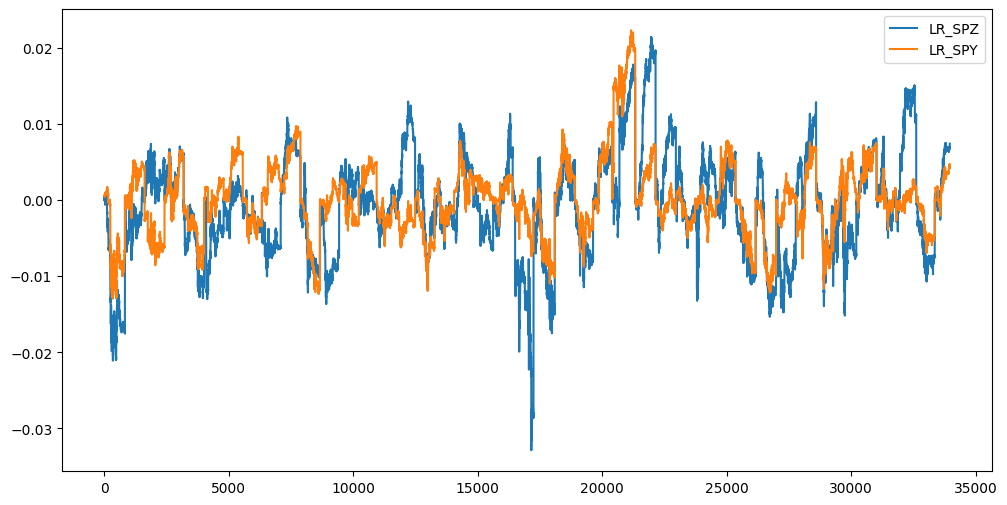

In [344]:
LR.groupby('Date')[['LR_SPZ', 'LR_SPY']].cumsum().plot(figsize=(12, 6))

<Axes: >

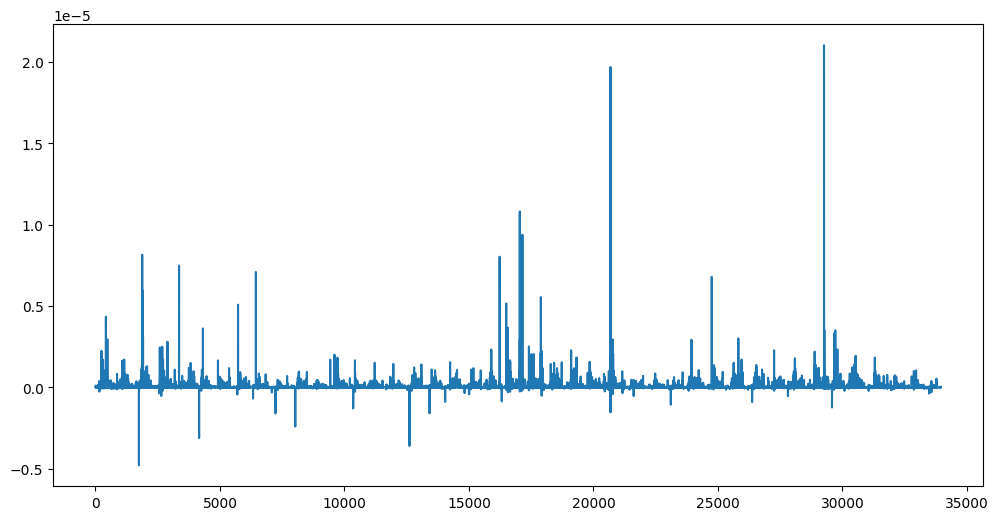

In [364]:
LR['int']=LR['LR_SPZ']*LR['LR_SPY']

LR['int'].plot(figsize=(12, 6))